# <font color=blue> Course2 - Improving Deep Neural Networks: Hyperparameter Tuning, Regularization and Optimization

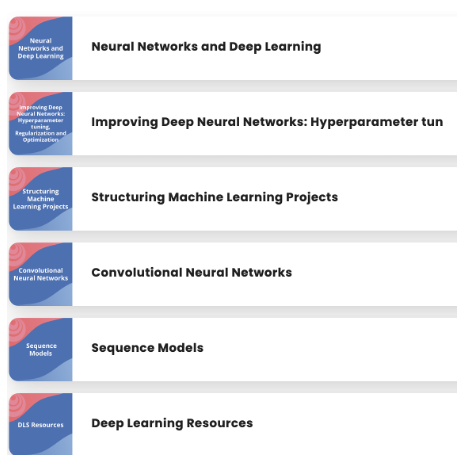

## Week 1 Introduction

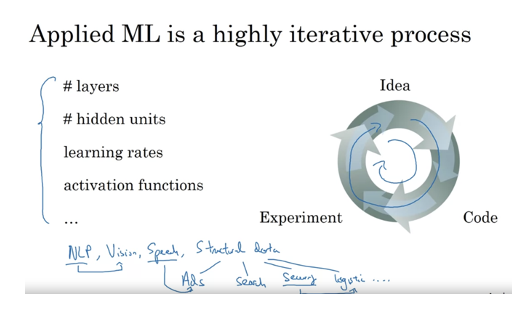

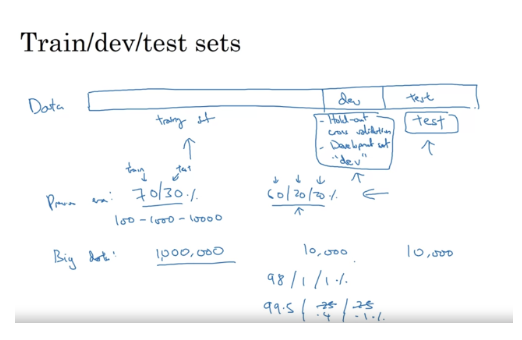

If u have small dataset, traditional split looks ok like 60-20-20 while if u have big data in modern DL era u might go for even smaller dev and test set like 98-1-1 or 99.5-.25-.25 etc

In the modern big data era, where, for example, you might have a million examples in total, then the trend is that your dev and test sets have been becoming a much smaller percentage of the total. Because remember, the goal of the dev set or the development set is that you're going to test different algorithms on it and see which algorithm works better. So the dev set just needs to be big enough for you to evaluate, say, two different algorithm choices or ten different algorithm choices and quickly decide which one is doing better. And you might not need a whole 20% of your data for that.

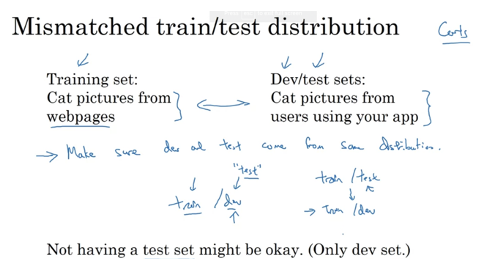

Today, deep learning has found great success in a lot of areas ranging from natural language processing, to computer vision, to speech recognition, to a lot of applications on also structured data. And structured data includes everything from advertisements to web search, which isn't just Internet search engines. It's also, for example, shopping websites.

Sometimes a researcher with a lot of experience in NLP might enter...you know, might try to do something in computer vision. Or maybe a researcher with a lot of experience in speech recognition might, you know, jump in and try to do something on advertising. Or someone from security might want to jump in and do something on logistics. And what I've seen is that intuitions from one domain or from one application area often do not transfer to other application areas. And the best choices may depend on the amount of data you have, the number of input features you have through your computer configuration and whether you're training on GPUs or CPUs.

The rule of thumb I'd encourage you to follow, in this case, is to make sure that the dev and test sets come from the same distribution.

Because you will be using the dev set to evaluate a lot of different models and trying really hard to improve performance on the dev set, it's nice if your dev set comes from the same distribution as your test set.

Finally, it might be okay to not have a test set. Remember, the goal of the test set is to give you a ... unbiased estimate of the performance of your final network, of the network that you selected. But if you don't need that unbiased estimate, then it might be okay to not have a test set

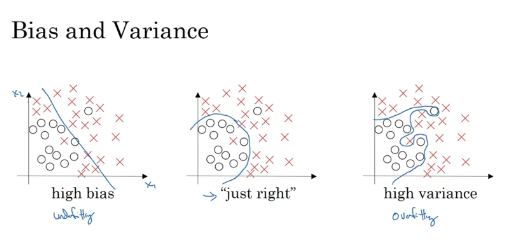

In a 2D example like this, with just two features, X-1 and X-2, you can plot the data and visualize bias and variance. In high dimensional problems, you can't plot the data and visualize division boundary. Instead, there are couple of different metrics, that we'll look at, to try to understand bias and variance.

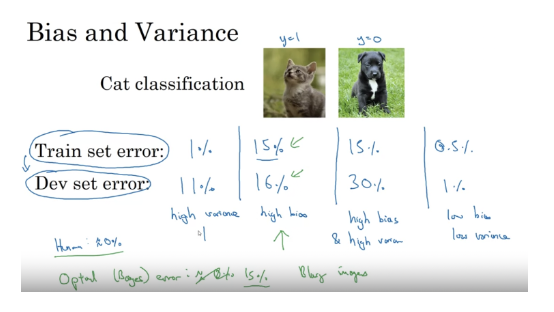

This analysis is predicated on the assumption, that human level performance gets nearly 0% error or, more generally, that the optimal error, sometimes called Bayes error, so the Bayesian optimal error is nearly 0%. If the optimal error or the Bayes error were much higher, say, it were 15%, then if you look at this classifier (15% Train set error, 16% Dev set error), 15% is actually perfectly reasonable for training set and you wouldn't say that's high bias and also a pretty low variance. So the case of how to analyze bias and variance, when no classifier can do very well, for example, if you have really blurry images, so that, you know, even a human or just no system could possibly do very well, then maybe Bayes error is much higher, and then there are some details of how this analysis will change.

- The takeaway is that by looking at your training set error, you can get a sense of how well you are fitting, at least the training data, and so that tells you if you have a bias problem.
- And then looking at how much higher your error goes, when you go from the training set to the dev set, that should give you a sense of how bad is the variance problem. So you're doing a good job generalizing from a training set to the dev set, that gives you a sense of your variance.
- All this is under the assumption that the Bayes error is quite small and that your training and your dev sets are drawn from the same distribution. If those assumptions are violated, there's a more sophisticated analysis you could do, which we'll talk about in the later video

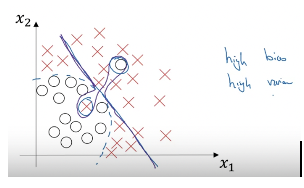

This example is a little bit contrived in two dimensions, but with very high dimensional inputs, you actually do get things with high bias in some regions and high variance in some regions. And so it is possible to get classifiers like this in high dimensional inputs that seem less contrived. 

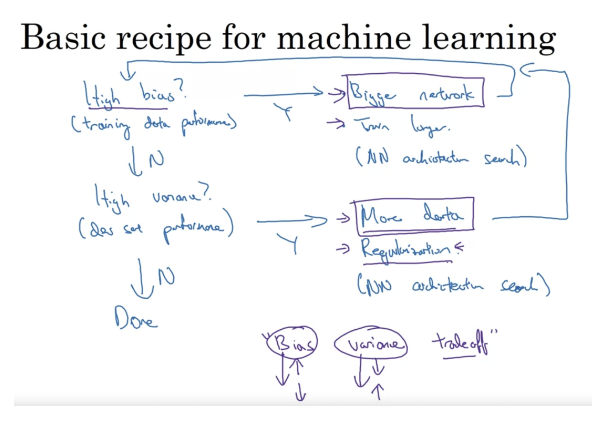

- Depending on whether you have high bias or high variance, the set of things you should try could be quite different. So I'll usually use the training dev set to try to diagnose if you have a bias or variance problem, and then use that to select the appropriate subset of things to try. So, for example, if you actually have a high bias problem, getting more training data is actually not going to help. Or, at least it's not the most efficient thing to do, alright? So being clear on how much of a bias problem or variance problem or both, can help you focus on selecting the most useful things to try.


- Second, in the earlier era of machine learning, there used to be a lot of discussion on what is called the bias variance tradeoff. And the reason for that was that, for a lot of the things you could try, you could increase bias and reduce variance, or reduce bias and increase variance. But, back in the pre-deep learning era, we didn't have many tools, we didn't have as many tools that just reduce bias, or that just reduce variance without hurting the other one. But in the modern deep learning, big data era, so long as you can keep training a bigger network, and so long as you can keep getting more data, which isn't always the case for either of these, but if that's the case, then getting a bigger network almost always just reduces your bias, without necessarily hurting your variance, so long as you regularize appropriately.And getting more data, pretty much always reduces your variance and doesn't hurt your bias much.


- So what's really happened is that, with these two steps, the ability to train, pick a network, or get more data, we now have tools to drive down bias and just drive down bias, or drive down variance and just drive down variance, without really hurting the other thing that much.

Training a bigger network almost never hurts. And the main cost of training a neural network that's too big is just computational time, so long as you're regularizing.

Regularization, is a very useful technique for reducing variance. There is a little bit of a bias variance tradeoff when you use regularization. It might increase the bias a little bit, although often not too much if you have a huge enough network.

## Regularization

If you suspect your neural network is over fitting your data, that is, you have a high variance problem, one of the first things you should try is probably regularization. The other way to address high variance is to get more training data that's also quite reliable. But you can't always get more training data, or it could be expensive to get more data. But adding regularization will often help to prevent overfitting, or to reduce variance in your network.

### Technique 1 - L1 and L2 Regularization

**L2 & L1 Regularization in Logistic Regression**

To add regularization to logistic regression, what you do is add to it, this thing, lambda, which is called the regularization parameter.

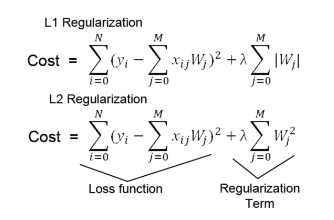

L2 regularization is the most common type of regularization. If you use L1 regularization, then w will end up being sparse. And what that means is that the w vector will have a lot of zeros in it

<font color=blue>**Note**

**Regularization** is a technique used to prevent overfitting in machine learning models, including logistic regression and neural networks. It does this by adding a penalty term to the loss function that the model tries to minimize.

There are two main types of regularization: L1 and L2.

**L1 Regularization (Lasso Regularization):**

The formula for L1 regularization adds the absolute value of the weights to the loss function. For a weight vector `w` with `n` elements (w1, w2, ..., wn), the L1 regularization term is:

L1 = λ * Σ |wi|

Here, λ is the regularization strength (a hyperparameter), and the sum is taken over all the weights in the weight vector.

**L2 Regularization (Ridge Regularization):**

The formula for L2 regularization adds the square of the weights to the loss function. For the same weight vector `w`, the L2 regularization term is:

L2 = λ * Σ (wi)^2

Again, λ is the regularization strength, and the sum is taken over all the weights in the weight vector.

**In Logistic Regression:**

In logistic regression, the cost function without regularization is the sum of the log loss across all the samples. With L1 or L2 regularization, the loss function becomes:

Loss = -[Σ (y log(p) + (1 - y) log(1 - p))] + L1 or L2

Here, y is the actual class (0 or 1), and p is the predicted probability of the class being 1.

**In Neural Networks:**

In neural networks, the loss function depends on the type of problem and could be something like mean squared error for regression problems or cross-entropy for classification problems. With L1 or L2 regularization, the loss function becomes:

Loss = original_loss + L1 or L2

In this case, the L1 or L2 regularization term is computed over all the weights in all the layers of the neural network.

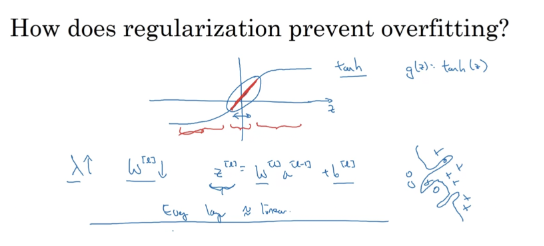

- If lambda, the regularization parameter is large, then you have that your parameters will be relatively small, because they are penalized being large in the cost function. 
- And in particular, if z ends up taking relatively small values, just in this little range, then g of z will be roughly linear. So it's as if every layer will be roughly linear, as if it is just linear regression. And we saw in course one that if every layer is linear, then your whole network is just a linear network.
- And so even a very deep network, with a deep network with a linear activation function is, at the end of the day, only able to compute a linear function. So it's not able to, you know, fit those very, very complicated decision, very non-linear decision boundaries that allow it to, you know, really overfit, right, to data sets, like we saw on the overfitting high variance case.
- So it its a pretty simple function, rather than a very complex highly non-linear function. And so, is also much less able to overfit.

*How does L2 Regularization avoid overfitting ?*

Overfitting is a problem in machine learning where a model learns the training data so well that it performs poorly on unseen data (like the validation or test sets). This usually happens when the model is too complex and captures noise or irrelevant details in the training data. 

L2 Regularization (also known as Ridge Regularization or Weight Decay) is one way to prevent overfitting. The way it works is by adding a penalty term to the loss function that the model minimizes. This penalty term is proportional to the sum of the squares of the model's weights. Therefore, larger weights result in a larger penalty, and the model is incentivized to keep its weights small.

Here's why this helps to avoid overfitting:

1. **Simplifying the Model**: By keeping the weights small, L2 regularization effectively reduces the complexity of the model. A simpler model is less likely to overfit to the training data. 

2. **Distributing Weights Evenly**: L2 regularization encourages the model to spread out its weights evenly, rather than putting a lot of weight on a few features and ignoring others. This can prevent the model from relying too heavily on a small number of potentially misleading features.

3. **Handling Multicollinearity**: In case of high correlation among features (multicollinearity), L2 regularization will distribute the coefficient evenly among the correlated features, which can help to reduce overfitting.

4. **Preventing Zeroing Out of Weights**: Unlike L1 regularization, which can push some weights to be exactly zero, L2 regularization keeps the weights small but typically not exactly zero. This is useful when all features have some relevance to the output variable.

Remember that the strength of the L2 regularization is controlled by a hyperparameter (often denoted as λ or alpha). If this is set too high, the model may underfit the data, because the regularization term will dominate the loss function. If it's set too low, the model may still overfit the data, because the regularization term won't have enough effect. The optimal value of this hyperparameter is usually found through cross-validation.


*How By keeping the weights small, L2 regularization effectively reduces the complexity of the model.?*

When we talk about complexity in a machine learning model, we're often referring to the model's capacity to fit a wide range of functions. A model with larger weights has the capacity to fit more complex, wiggly functions because larger weights allow the model to put more importance on certain features, potentially capturing more intricate patterns in the data.

However, when a model puts too much importance on a small set of features (having large weights), it tends to learn the noise in the training data, and not the underlying pattern. This results in a complex model that overfits to the training data, and doesn't generalize well to unseen data.

L2 regularization discourages large weights by adding a penalty to the loss function that increases with the size of the weights. As a result, during training, the model is forced to keep the weights small, unless the benefit of increasing a weight (in terms of reducing the original loss) outweighs the penalty incurred.

By keeping the weights small, L2 regularization essentially simplifies the model. The model becomes less sensitive to individual features, and thus less likely to capture noise in the training data. This reduces the model's capacity to fit overly complex, wiggly functions, and instead encourages it to learn simpler, smoother functions that better capture the underlying pattern in the data, and generalize better to unseen data.

So, in essence, L2 regularization reduces model complexity by encouraging the model to have small weights, thus preventing it from fitting too closely to the noise or outliers in the training data. It's a trade-off between fitting the training data well and keeping the model simple to ensure good performance on unseen data.


*what does it mean by when a model puts too much importance on a small set of features (having large weights), it tends to learn the noise in the training data, and not the underlying pattern. ?*

To understand this, let's break it down a bit.

A machine learning model learns patterns in the data by adjusting its weights. The weights in a model determine the importance of the corresponding features for the prediction task. A higher weight means the model considers that feature more important when making a prediction.

When a model assigns a large weight to a specific feature, it's effectively saying that this feature is very important for predicting the target variable. This is fine if the feature truly is important. But, sometimes, a feature might appear to be important in the training data due to random noise or outliers, rather than an underlying pattern that generalizes to new data.

For instance, let's say you're training a model to predict house prices, and there's a feature in your training data that measures the number of trees in the yard. Due to random chance, the most expensive house in your training data might just happen to have a lot of trees in its yard. If the model assigns a large weight to this feature, it will heavily base its price predictions on the number of trees in the yard, which is likely not a universally applicable or meaningful pattern.

When a model overemphasizes such features by assigning them large weights, it risks learning from the noise in the training data rather than the true underlying pattern. This is called overfitting. The model might perform well on the training data because it has learned even the random fluctuations in it, but it's likely to perform poorly on new, unseen data, because the noise in the training data doesn't generalize to new data.

By encouraging smaller weights, L2 regularization helps to avoid this issue. The model becomes less sensitive to any single feature and is more likely to find a balance across all features, which is typically more representative of the true underlying pattern. This helps the model generalize better to unseen data, improving its predictive performance.


*But, sometimes, a feature might appear to be important in the training data due to random noise or outliers what can be example of outlier?*

An outlier is a data point that significantly differs from other observations. It can occur due to variability in the data, data entry errors, or other unusual conditions. Here's an example:

Let's say you're building a machine learning model to predict the price of a car based on various features such as its age, mileage, brand, etc. You have collected data from a wide range of car sales, but among those data, there is a vintage car sold at an auction for a very high price compared to its age and mileage.

In this case, the vintage car's price is an outlier because it's significantly higher than the prices of other cars with similar ages and mileages. This unusual high price is not due to the age or mileage (or any other typical factors), but rather because it's a collectible vintage car, which is a factor not present in your features.

If your model gives a lot of importance to the age and mileage features because of this single vintage car data point, it might start predicting higher prices for all old cars with low mileage, thinking that they are all valuable vintage cars. In reality, most old cars with low mileage aren't that valuable. So, the model would have learned from an outlier (a noise), which doesn't represent the general pattern in the data. This can lead to inaccurate predictions on new, unseen data. 

This is why it's often a good idea to treat or remove outliers before training a machine learning model, to prevent them from unduly influencing the model.



### Technique 2 - Dropout Regularization

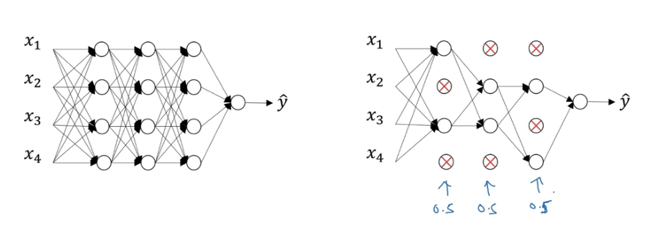

Let's say that for each of these layers, we're going to-> for each node, toss a coin and have a 0.5 chance of keeping each node and 0.5 chance of removing each node. So, after the coin tosses, maybe we'll decide to eliminate those nodes, then what you do is actually remove all the outgoing things from that node as well. So you end up with a much smaller, really much diminished network. And then you do back propagation training. There's one example on this much diminished network. And then on different examples, you would toss a set of coins again and keep a different set of nodes and then dropout or eliminate different than nodes. And so for each training example, you would train it using one of these neural based networks.

Dropout regularization helps address overfitting by introducing randomness and preventing the reliance on specific neurons during training. By randomly dropping neurons during training, dropout regularization helps to reduce overfitting by preventing the network from relying too heavily on specific features or co-adaptation of neurons.

### Implementing Dropout using technique called 'Inverted Dropout'

For different training examples, you zero out different hidden units. And in fact, if you make multiple passes through the same training set, then on different pauses through the training set, you should randomly zero out different hidden units. So, it's not that for one example, you should keep zeroing out the same hidden units is that, on iteration one of grade and descent, you might zero out some hidden units. And on the second iteration of great descent where you go through the training set the second time, maybe you'll zero out a different pattern of hidden units.

At test time you're not using dropout and that's because when you are making predictions at the test time, you don't really want your output to be random.


**Note**
In general, the number of neurons in the previous layer gives us the number of columns of the weight matrix, and the number of neurons in the current layer gives us the number of rows in the weight matrix.

**Dropout vs Inverted Dropout**

"Inverted dropout" is a technique used in training neural networks that offers an improved version of the standard dropout. The idea behind dropout is to randomly disable some neurons in a layer during training, which helps to prevent overfitting. Each neuron is "dropped out" (i.e., set to zero) independently with a certain probability during training.

The "inverted" part of "inverted dropout" comes from a handy trick to make the network easier to understand and less complex at test time. In standard dropout, if we drop out neurons with a probability of p during training, then at test time, we need to scale the outputs by 1-p to account for the fact that all neurons are active (none are dropped). This is because, during testing, we usually don't apply dropout and we keep all the neurons active, but they have been trained to be only active 1-p of the time.

Inverted dropout simplifies this by doing the scaling at training time instead of at test time. This way, no scaling is needed at test time since the expected output of each neuron remains the same whether dropout is applied or not. Specifically, during training, when a neuron is not dropped, its output is multiplied by 1/(1-p). This compensates for the times when it would have been zeroed.

Inverted dropout doesn't fundamentally change what dropout does, it merely changes when the scaling is done. However, it can make the network simpler and more efficient at test time, as no additional scaling operations are needed.

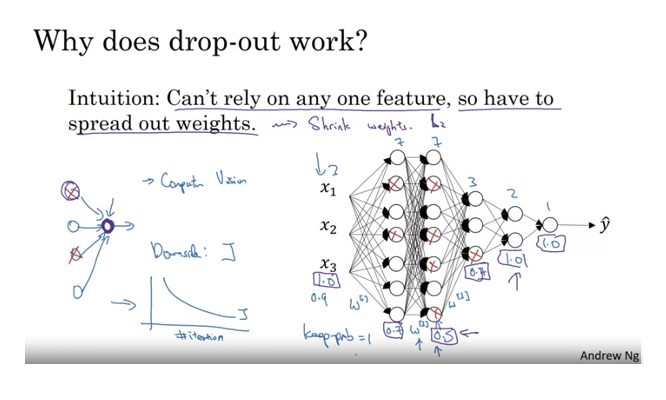

The ways were reluctant to put too much weight on any one input because it could go away at random. So this unit will be more motivated to spread out this ways and give you a little bit of weight to each of the four inputs to this unit. And by spreading out the weights this will tend to have an effect of shrinking the squared norm of the weights, and so similar to what we saw with L2 regularization.

W2 is actually the biggest weight matrix, right? Because they're actually the largest set of parameters. B and W2, which is 7 by 7. So to prevent, to reduce overfitting of that matrix, maybe for this layer, I guess this is layer 2, you might have a key prop that's relatively low, say 0.5 (so more neurons r diffused), whereas for different layers where you might worry less about overvitting, you could have a higher key prob. And then for layers we don't worry about overfitting at all. You can have a key prop of 1.0 so none of neurons r shut off.

And so unless my model is overfitting, I wouldn't actually bother to use drop out. So as you somewhat less often in other application areas, there's just a computer vision, you usually just don't have enough data so you almost always overfitting, which is why they tend to be some computer vision researchers swear by drop out by the intuition. Doesn't always generalize, I think to other disciplines. 

One big downside of drop out is that the cost function J is no longer well defined on every iteration. You're randomly, calling off a bunch of notes.(Note cost function is a finction og weights & biases, if weights & biases r not well defined oor diffused in each iteration hence is cost function.



### Other Regularization Techniques

### Data Augmentation

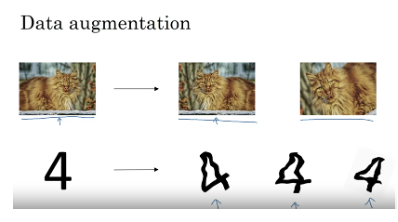

If you are over fitting getting more training data can help, but getting more training data can be expensive and sometimes you just can't get more data. But what you can do is augment your training set by taking image like this. And for example, flipping it horizontally and adding that also with your training set.This isn't as good as if you had collected an additional set of brand new independent examples. But you could do this Without needing to pay the expense of going out to take more pictures of cats. And then other than flipping horizontally, you can also take random crops of the image.  Again, these extra fake training examples they don't add as much information as they were to call they get a brand new independent example of a cat. But because you can do this, almost for free, other than for some computational costs. This can be an inexpensive way to give your algorithm more data and therefore sort of regularize it and reduce over fitting.

### Early Stopping

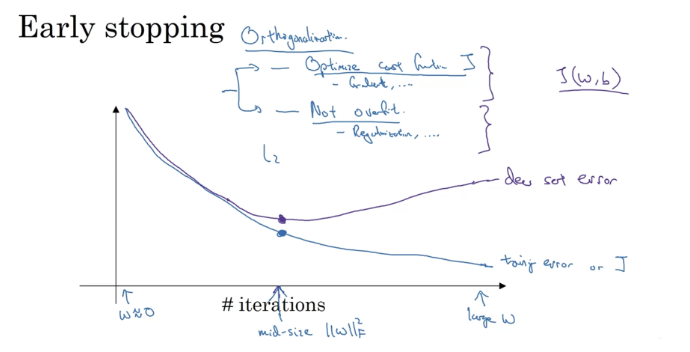

- With random initialization you probably initialize w to small random values so before you train for a long time, w is still quite small. And as you iterate, as you train, w will get bigger and bigger and bigger until here maybe you have a much larger value of the parameters w for your neural network.
- So what early stopping does is by stopping halfway you have only a mid-size rate w. And so similar to L2 regularization by picking a neural network with smaller norm for your parameters w, hopefully your neural network is over fitting less. And the term early stopping refers to the fact that you're just stopping the training of your neural network earlier.
- I think of the machine learning process as comprising several different steps. One, is that you want an algorithm to optimize the cost function j and we have various tools to do that, such as grade descent. But after optimizing the cost function j, you also wanted to not over-fit. And we have some tools to do that such as your regularization, getting more data and so on.
- And so I find machine learning easier to think about when you have one set of tools for optimizing the cost function J, and when you're focusing on authorizing the cost function J. All you care about is finding w and b, so that J(w,b) is as small as possible. You just don't think about anything else other than reducing this. And then it's completely separate task to not over fit, in other words, to reduce variance. And when you're doing that, you have a separate set of tools for doing it. And this principle is sometimes called **orthogonalization**


**Downside of early stopping**

But, to me the main downside of early stopping is that this couples these two tasks. So you no longer can work on these two problems independently, because by stopping gradient decent early, you're sort of breaking whatever you're doing to optimize cost function J, because now you're not doing a great job reducing the cost function J. You've sort of not done that that well. And then you also simultaneously trying to not over fit. So instead of using different tools to solve the two problems, you're using one that kind of mixes the two.

Rather than using early stopping, one alternative is just use L2 regularization then you can just train the neural network as long as possible. I find that this makes the search space of hyper parameters easier to decompose, and easier to search over. But the downside of this though is that you might have to try a lot of values of the regularization parameter lambda. And so this makes searching over many values of lambda more computationally expensive. And the advantage of early stopping is that running the gradient descent process just once, you get to try out values of small w, mid-size w, and large w, without needing to try a lot of values of the L2 regularization hyperparameter lambda.

## Setting up ur optimization problem so ur training can go quickly 

### 1. Normalizing Inputs

One of the techniques to speed up your training is if you normalize your inputs.

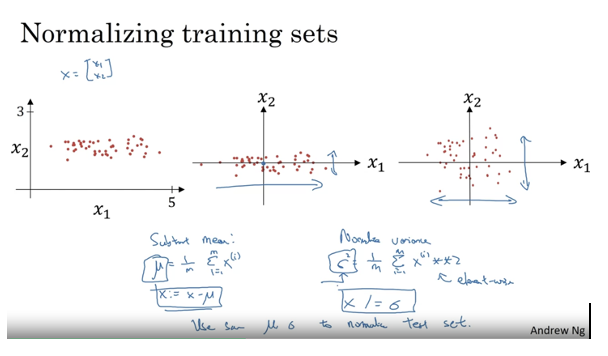

In practice, normalizing the data often involves subtracting the mean (centering the data around 0) and dividing by the standard deviation (scaling the data to unit variance). However, the appropriate normalization method can depend on the specific algorithm and data.






Normalizing mean means moving training set such that mean is 0 as seen in fig 1 to fig 2 and normalizing variance. Normalizing variance seen from fig 2 to fig 3 where in fig 2 feature x1 has much more variance than feature x2 but in fig 3 variance is normalized.

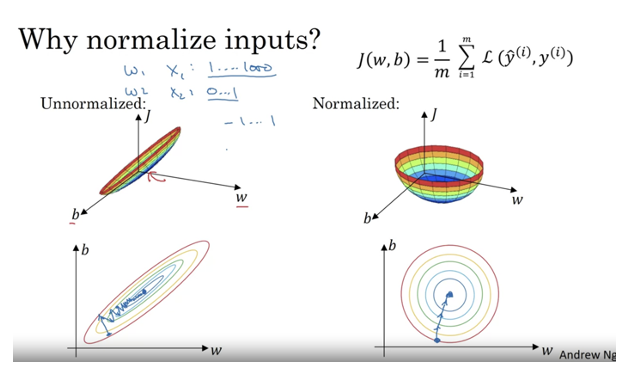

When features are not normalized, Cost function can be very elongated bow like that. If you plot the contours of this function, you can have a very elongated function like that. Whereas if you normalize the features, then your cost function will on average look more symmetric. If you are running gradient descent on a cost function like the one on the left, then you might have to use a very small learning rate because if you're here, the gradient decent might need a lot of steps to oscillate back and forth before it finally finds its way to the minimum. Whereas if you have more spherical contours, then wherever you start, gradient descent can pretty much go straight to the minimum. You can take much larger steps where gradient descent need, rather than needing to oscillate around like the picture on the left. Of course, in practice, w is a high dimensional vector. Trying to plot this in 2D doesn't convey all the intuitions correctly. But the Rough intuition that you cost function will be in a more round and easier to optimize when you're features are on similar scales. 

### 2. Weight initialization for Deep N/w's to avoid vanishing/exploding gradient problem.

Very deep neural networks can have the problems of vanishing and exploding gradients. It turns out that a partial solution to this, doesn't solve it entirely but helps a lot, is better or more careful choice of the random initialization for your neural network.

All of these formulas just give you a starting point. It gives you a default value to use for the variance of the initialization of your weight matrices.

**Quiz**

Xavier initialization, also known as Glorot initialization, is a weight initialization technique used in neural networks. It doesn't increase or decrease the regularization of a model directly. Instead, it helps to ensure that the weights are initialized with suitable values that can speed up the convergence of the model during training and help to avoid issues like vanishing or exploding gradients.

When you increase the keep_prob from 0.5 to 0.6, it means that during training, each neuron is now kept active with a probability of 0.6 instead of 0.5. This reduces the amount of dropout, meaning that more neurons are kept active during each training step.

As a result, the model has more capacity to learn from the data because more of the neurons are being used in each forward and backward pass. Therefore, you would generally expect the training error to decrease, because the model can fit the training data more closely.

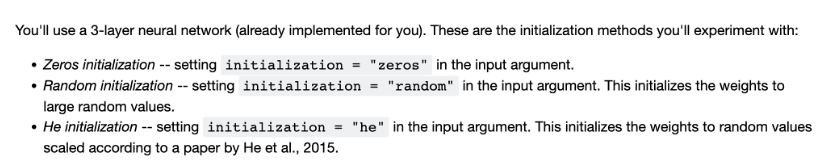

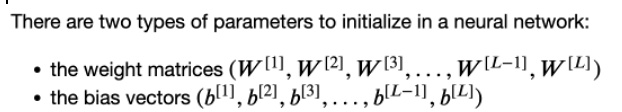

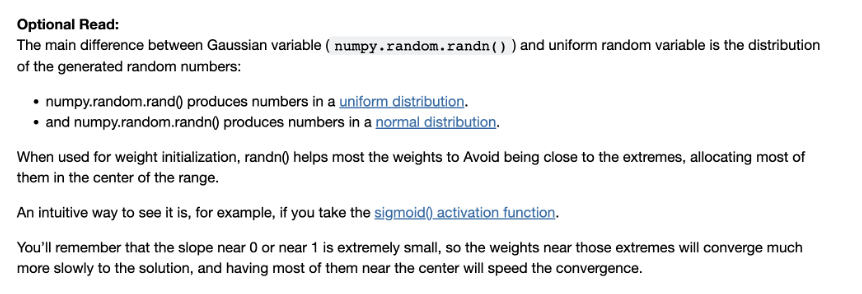

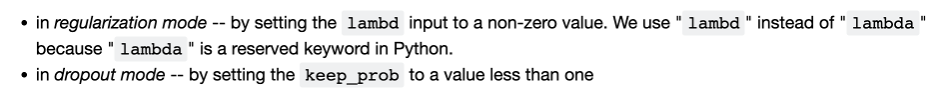

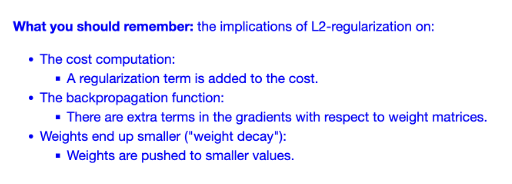

When you shut some neurons down, you actually modify your model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time. 


Its interesting how sometimes asking a simple question leads u to thinking about so many different things & forces u to think about so many elements that u'd like to bring together like a big puzzle.

What r the causes of what i am seeing and how could i influence what i am seeing by my actions.

Reading, doing lots of experiments, making sure u understand everything u do especially science part of it. Trying to ask why i am doing this? Maybe ans is somethere in book & u have to read more but its even better if u can figure it out by urself.

## Week 2 Optimization Algorithms

Optimization algorithms that will enable you to train your neural network much faster. You've heard me say before that applying machine learning is a highly empirical process, is a highly iterative process. In which you just had to train a lot of models to find one that works really well. So, it really helps to really train models quickly. One thing that makes it more difficult is that Deep Learning tends to work best in the regime of big data. We are able to train neural networks on a huge data set and training on a large data set is just slow. So, what you find is that having fast optimization algorithms, having good optimization algorithms can really speed up the efficiency of you and your team

**Vectorization over for loop**

Vectorization allows you to efficiently compute on all m examples, that allows you to process your whole training set without an explicit For loop. That's why we would take our training examples and stack them into these huge matrix capsule Xs. X1, X2, X3, and then eventually it goes up to XM training samples. And similarly for Y this is Y1 and Y2, Y3 and so on up to YM.

## 1.Batch and Mini-Batch Gradient Descent Optimization algorithm

**Batch Gradient Descent**

With the implementation of gradient descent on your whole training set, what you have to do is, you have to process your entire training set before you take one little step of gradient descent. And then you have to process your entire training sets of five million training samples again before you take another little step of gradient descent.

**Mini-batch Gradient Descent**

So, it turns out that you can get a faster algorithm if you let gradient descent start to make some progress even before you finish processing your entire, your giant training sets of 5 million examples. In particular, here's what you can do. Let's say that you split up your training set into smaller, little baby training sets and these baby training sets are called mini-batches. And let's say each of your baby training sets have just 1,000 examples each. Now, if you have 5 million training samples total and each of these little mini batches has a thousand examples, that means you have 5,000 of these because you know, 5,000 times 1,000 equals 5 million.Altogether you would have 5,000 of these mini batches.

Batch gradient descent, refers to the gradient descent algorithm Where you process your entire training set all at the same time. Whereas with batch gradient descent, a single pass through the training set allows you to take only one gradient descent step. With mini-batch gradient descent, a single pass through the training set, that is one epoch, allows you to take 5,000 gradient descent steps. Now of course you want to take multiple passes through the training set which you usually want to, you might want another for loop for another while loop out there.

So you keep taking passes through the training set until hopefully you converge or at least approximately converged. When you have a large training set, mini-batch gradient descent runs much faster than batch gradient descent

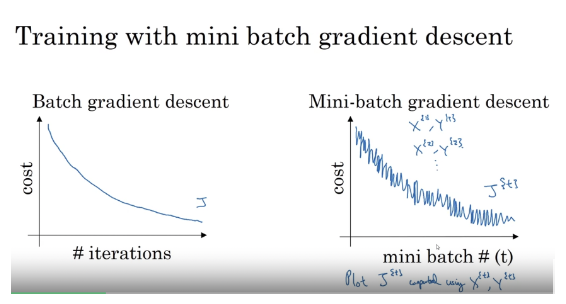

So if we've had the cost function j as a function of different iterations it should decrease on every single iteration. And if it ever goes up even on iteration then something is wrong. Maybe you're running ways to big. On mini batch gradient descent though, if you plot progress on your cost function, then it may not decrease on every iteration. In particular, on every iteration you're processing some X{t}, Y{t} and so if you plot the cost function J{t}, which is computer using just X{t}, Y{t}. Then it's as if on every iteration you're training on a different training set or really training on a different mini batch. So you plot the cost function J, you're more likely to see something that looks like this. It should trend downwards, but it's also going to be a little bit noisier. the reason it'll be a little bit noisy is that, maybe X{1}, Y{1} is just the rows of easy mini batch so your cost might be a bit lower, but then maybe just by chance, X{2}, Y{2} is just a harder mini batch. Maybe you had some mislabeled examples in it, in which case the cost will be a bit higher and so on. So that's why you get these oscillations as you plot the cost when you're running mini batch gradient descent.

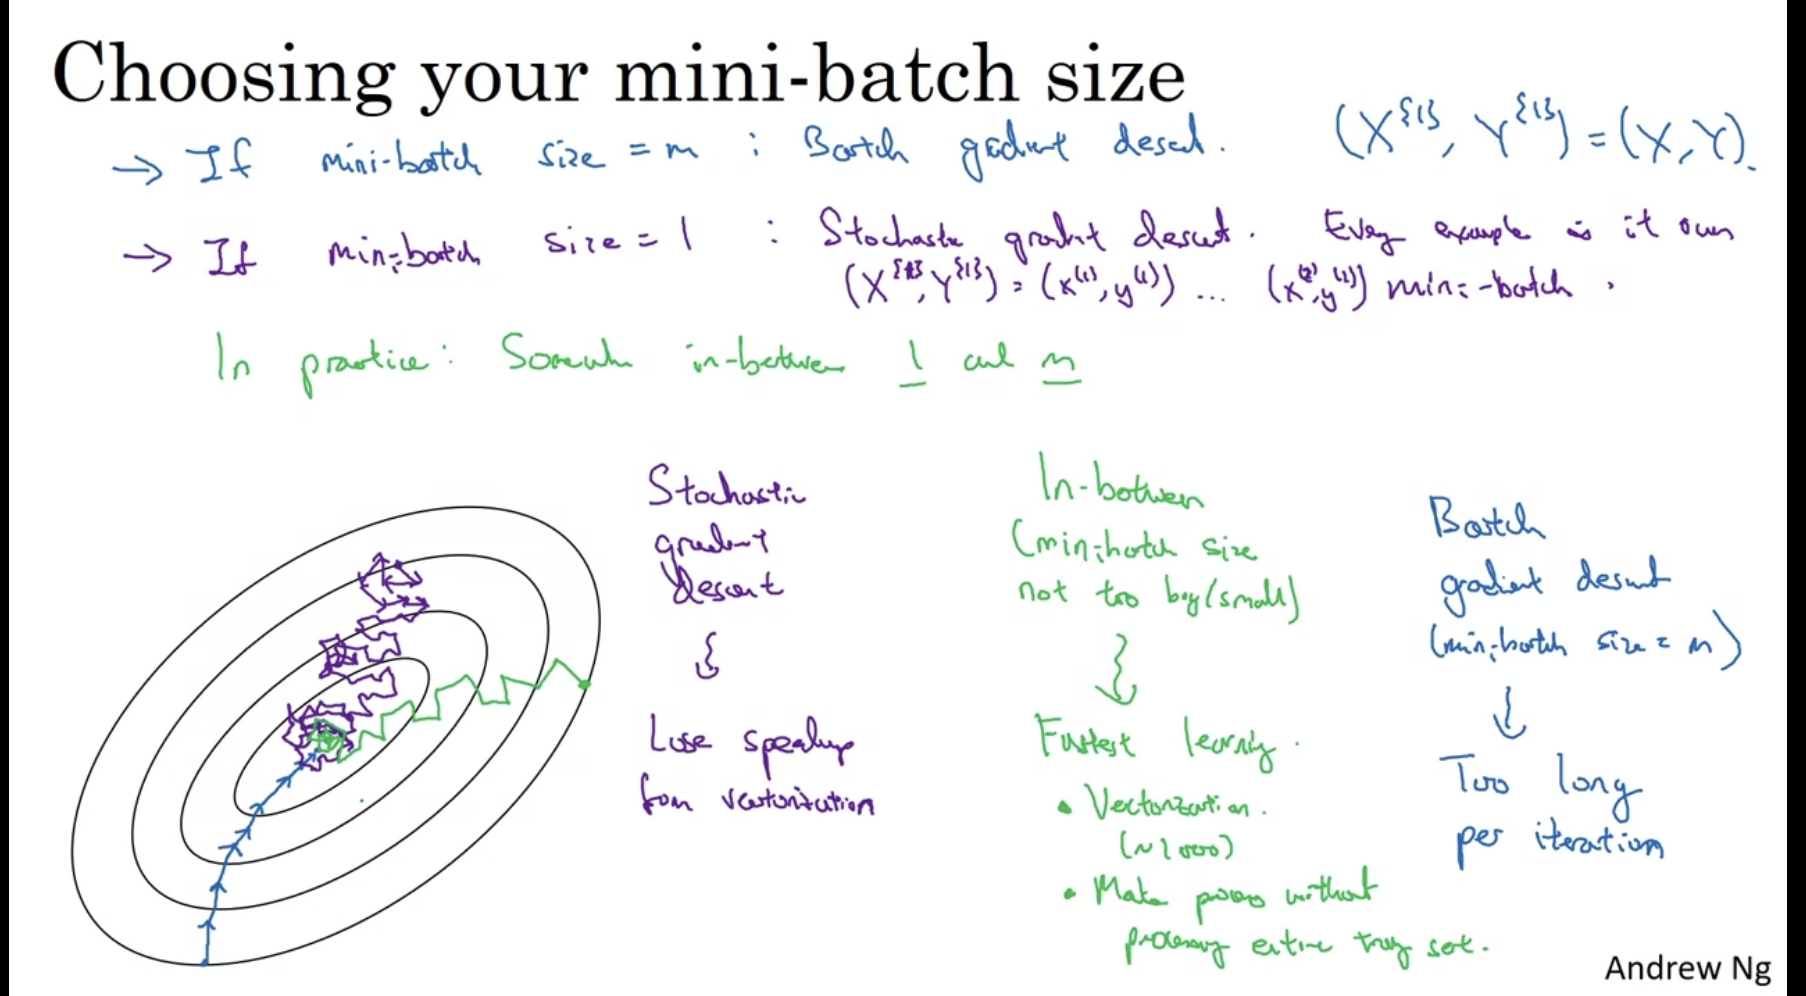

If total dataset size until 2000 just use batch gradient descent, mini-batch not required.

A few optimization algorithms which are faster than gradient descent. In order to understand those algorithms, you need to be able they use something called exponentially weighted averages. Also called exponentially weighted moving averages in statistics.

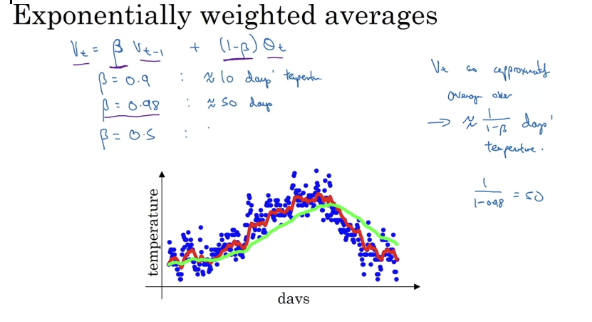

And the more general formula is V on a given day is 0.9 times V from the previous day, plus 0.1 times the temperature of that day.

With high value of beta u r averaging over more days of temperature. So, the curve (green curve) is just, you know, less wavy is now smoother, but on the flip side the curve has now shifted further to the right because you're now averaging over a much larger window of temperatures. And by averaging over a larger window, this formula, this exponentially weighted average formula. It adapts more slowly, when the temperature changes. So, there's just a bit more latency. And the reason for that is when Beta 0.98 then it's giving a lot of weight to the previous value and a much smaller weight just 0.02, to whatever you're seeing right now.


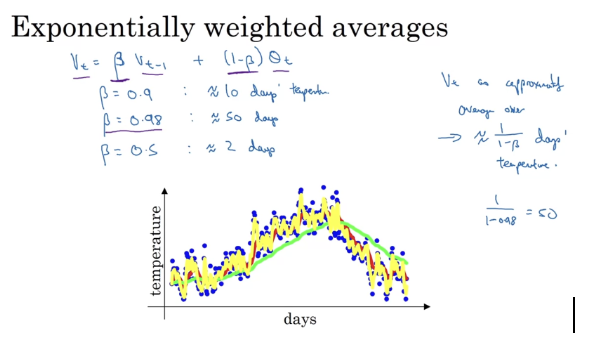

**Something like averaging over just two days temperature, and you plot that you get this yellow line. And by averaging only over two days temperature, you have a much, as if you're averaging over much shorter window. So, you're much more noisy, much more susceptible to outliers.But this adapts much more quickly to what the temperature changes.**

What is exponentially weighted averages and how to compute those ?

The concept is to give more weight to more recent data and less weight to older data. The "exponential" name refers to the fact that weights decrease exponentially. This method smooths out short-term fluctuations and highlights longer-term trends or cycles.


Here's the basic formula to calculate an exponentially weighted average:

V[t] = beta * V[t-1] + (1-beta) * x[t]

where:

V[t] is the value at time t
V[t-1] is the exponentially weighted average at time t-1
x[t] is the raw data at time t
beta is the decay rate, usually a number between 0 and 1

Exponentially weighted averages. This will turn out to be a key component of several optimization algorithms that you used to train your neural networks.

### Bias Correction in Exponentially Weighted Averages

Bias correction that can make your computation of these averages more accurate.

## 2. Gradient descent with momentum optimization algorithm

There's an algorithm called momentum, or gradient descent with momentum that almost always works faster than the standard gradient descent algorithm. In one sentence, the basic idea is to compute an exponentially weighted average of your gradients, and then use that gradient to update your weights instead.

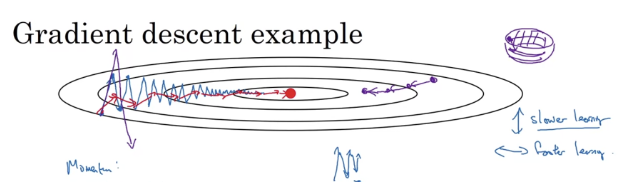

If you average out these gradients, you find that the oscillations in the vertical direction will tend to average out to something closer to zero. So, in the vertical direction, where you want to slow things down, this will average out positive and negative numbers, so the average will be close to zero. Whereas, on the horizontal direction, all the derivatives are pointing to the right of the horizontal direction, so the average in the horizontal direction will still be pretty big. So that's why with this algorithm, with a few iterations you find that the gradient descent with momentum ends up eventually just taking steps that are much smaller oscillations in the vertical direction, but are more directed to just moving quickly in the horizontal direction. And so this allows your algorithm to take a more straightforward path, or to damp out the oscillations in this path to the minimum.

Momentum is a method used to accelerate gradient descent learning algorithm and to reduce oscillations. It is inspired by physical laws of motion, where the name "momentum" comes from. 

In gradient descent, the idea is to find the minimum of the cost function by taking steps proportional to the negative of the gradient of the cost function at the current point. However, this can lead to oscillations, particularly when the cost function has a shape like a ravine, i.e., much steeper in one dimension than in the other, which is often the case in machine learning problems.

Momentum helps to overcome this by adding a fraction of the direction of the previous step to a current step. This serves to dampen oscillations and speed up convergence. 

The update rule of the gradient descent with momentum looks as follows:

v[dw] = beta * v[dw] + (1-beta) * dw

w = w - learning_rate * v[dw]

Where:
- w is the weight parameter we want to update.
- dw is the gradient of the cost function with respect to w.
- v[dw] is the velocity term (the direction and rate that the weights will be updated). It is initialized to zero for the first iteration.
- beta is the momentum term (usually set to a value like 0.9). 
- learning_rate is a hyperparameter determining the step size during the update of the weights.

In the first equation, we compute an exponentially weighted average of the gradients to update v[dw]. In the second equation, we then update our weights w by subtracting the product of learning rate and v[dw].

The momentum term beta is the weight given to the previous gradients, with the (1-beta) term acting as a weight for the current gradient. High momentum (i.e., beta close to 1) results in larger step sizes in directions that have consistently had the same sign of gradient, helping the algorithm converge faster.

## 3. RMSprop optimization algorithm

You've seen how using momentum can speed up gradient descent. There's another algorithm called RMSprop, which stands for root mean square prop, that can also speed up gradient descent.

It is named as such because it utilizes the root mean square (RMS) of the gradients to normalize the learning rate. The term root mean square (RMS) in RMSProp comes from the mathematical operation it performs. It calculates the square root (root) of the mean (average) of the square of the gradients (mean square). This operation helps in normalizing the learning rate during the training of the neural networks. So, the name RMSProp comes from the root mean square operation that it performs in the process of normalizing the learning rate for each weight in the neural network.








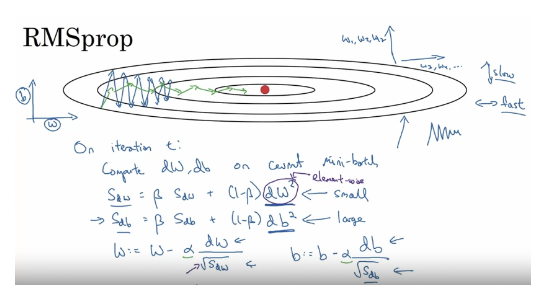

So that's RMSprop, and similar to momentum, has the effects of damping out the oscillations in gradient descent, in mini-batch gradient descent. And allowing you to maybe use a larger learning rate alpha. And certainly speeding up the learning speed of your algorithm.

## 4. Adam optimization algorithm

RMSprop and the Adam optimization algorithm, which we'll talk about in this video, is one of those rare algorithms that has really stood up, and has been shown to work well across a wide range of deep learning architectures. The Adam optimization algorithm is basically taking momentum and RMSprop, and putting them together. 

V notation is for momentum and S notation is for RMS, root mean sqaure. Adam is a combination of both. Ultimately we r trying for a variation of gradient descent for faster conversion.

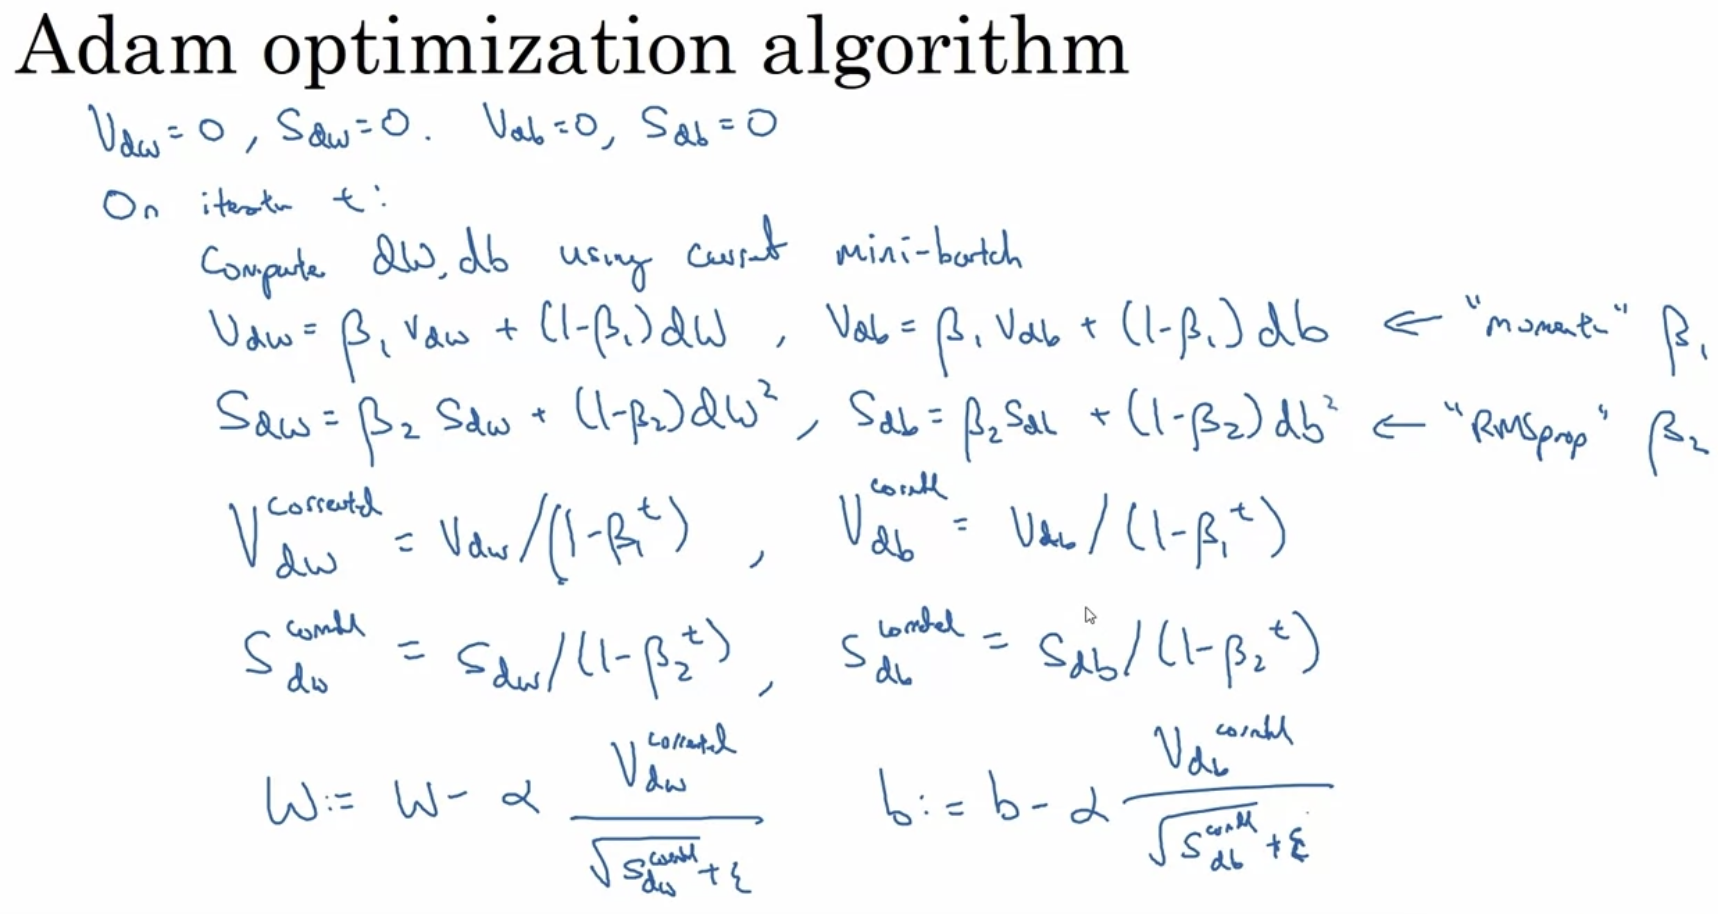

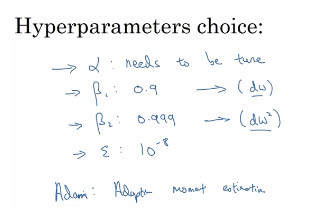

### Learning Rate Decay

One of the things that might help speed up your learning algorithm is to slowly reduce your learning rate over time. We call this learning rate decay.

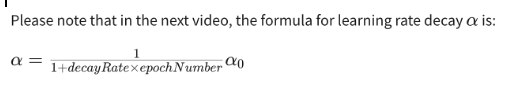

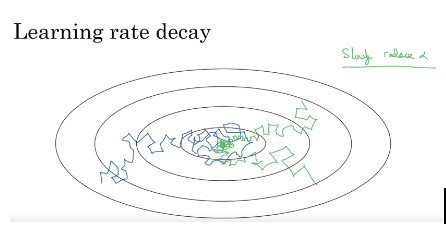

The intuition behind slowly reducing Alpha is that maybe during the initial steps of learning, you could afford to take much bigger steps, but then as learning approaches convergence, then having a slower learning rate allows you to take smaller steps. 

Learning rate decay methods-

Learning rate decay methods adjust the learning rate during training. This can improve the accuracy and perhaps speed of the learning process. Here are some common learning rate decay methods:

1. **Step Decay**: The learning rate is reduced by a certain factor after a specific number of epochs. It remains constant for that number of epochs and then decreases again.

2. **Exponential Decay**: The learning rate is decreased exponentially over time. The general formula for exponential decay is lr = lr0 * e^(−kt), where lr, lr0, k, and t are the learning rate, initial learning rate, decay constant, and epoch number respectively.

3. **Inverse Time Decay**: The learning rate decreases over time, following an inverse scaling schedule. The learning rate is divided by the square root of the epoch number.

4. **Polynomial Decay**: In this method, the learning rate follows a polynomial function, dropping more sharply at the end of training. It could be a power of 2 (quadratic), 3 (cubic), or any other number depending on the decay rate you choose.

5. **Cosine Annealing**: This method decreases the learning rate following a cosine function between a lower and an upper bound over each cycle.

6. **Warm Restarts**: Also known as SGDR (Stochastic Gradient Descent with Restarts), this technique involves performing cyclical learning rates and periodically resetting the learning rate to its initial value.

7. **1cycle policy**: This is a variation of cyclical learning rates introduced by Leslie Smith in 2018. Instead of oscillating the learning rate between a minimum and maximum value for each cycle, the learning rate starts from a minimum value, increases to a maximum value for the first half of training, then decreases to a minimum for the second half of training. A further decay can be applied during the final epochs.

8. **Adaptive learning rate decay methods**: These are methods where the learning rate is adjusted dynamically based on the training process, including AdaGrad, RMSprop, Adam, and others. In these methods, the learning rate is adapted for each of the parameters specifically, often based on the historical gradients that have been computed for the parameter.

Remember that it's important to monitor the learning process when using learning rate decay, as too fast decay can lead to local minima, while too slow decay might result in overshooting the minima.


### The Problem of Local Optima

#### Types of Optimization Problems that ur optimization algorithm is trying to solve while u train these neural n/w's

If you have 20,000 parameters, then J as your function over 20,000 dimensional vector, then you're much more likely to see saddle points than local optimum.  If local optima aren't a problem, then what is a problem? It turns out that plateaus can really slow down learning and a plateau is a region where the derivative is close to zero for a long time. So if you're here, then gradient descents will move down the surface, and because the gradient is zero or near zero, the surface is quite flat. You can actually take a very long time, you know, to slowly find your way to maybe this point on the plateau.

So because your network is solving optimizations problems over such high dimensional spaces, to be honest, I don't think anyone has great intuitions about what these spaces really look like, and our understanding of them is still evolving.

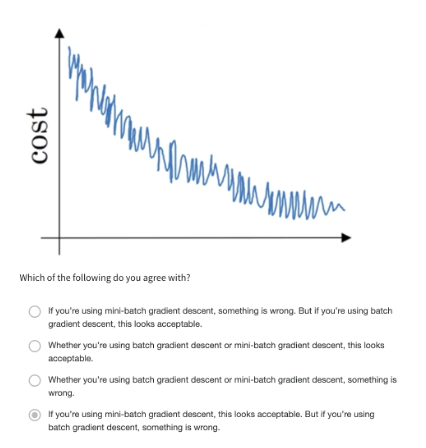

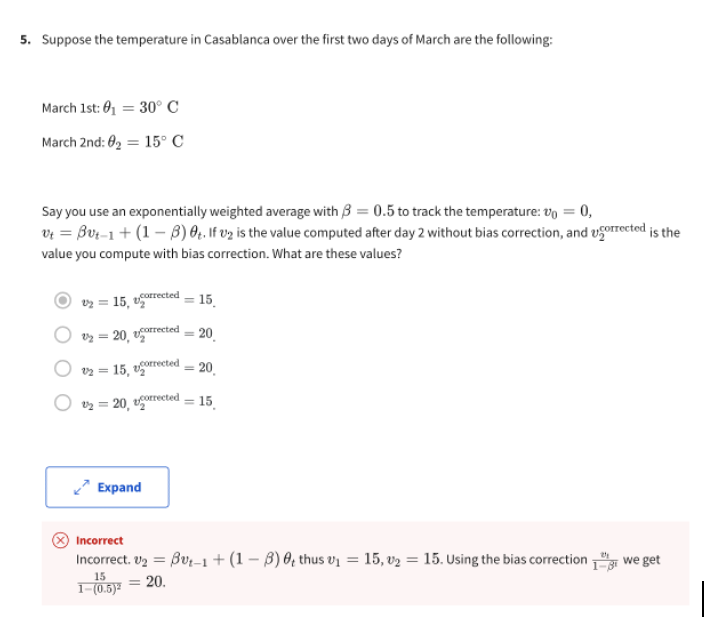

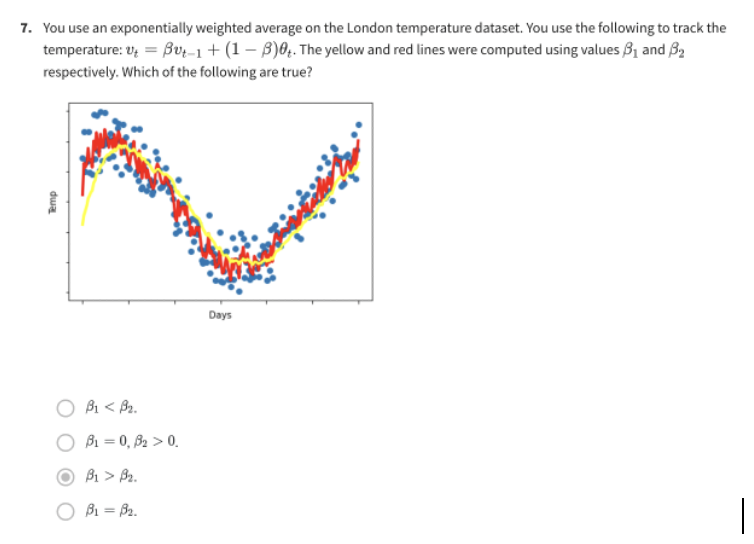

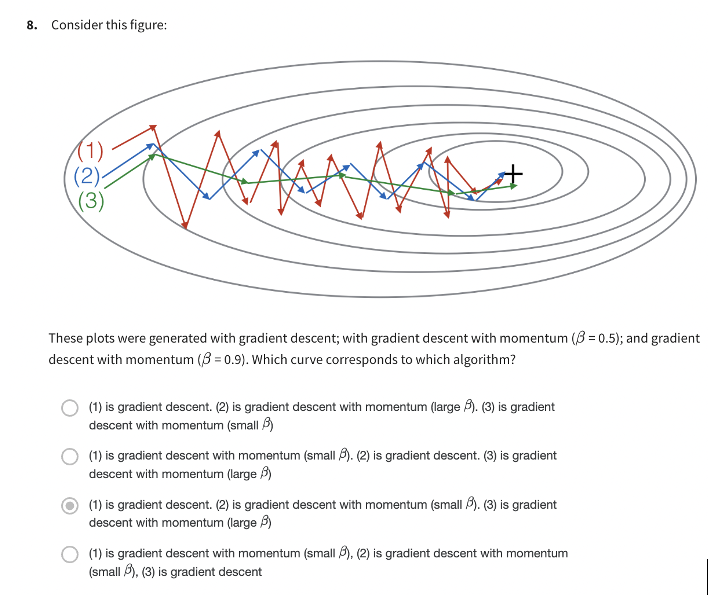

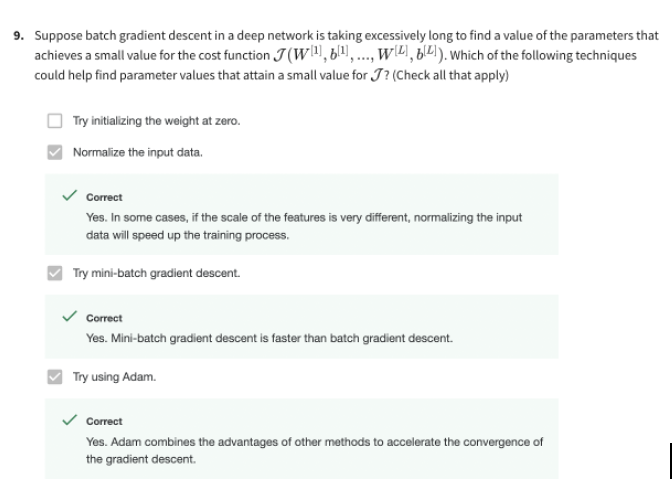

Until now, you've always used Gradient Descent to update the parameters and minimize the cost. In this notebook, you'll gain skills with some more advanced optimization methods that can speed up learning and perhaps even get you to a better final value for the cost function. Having a good optimization algorithm can be the difference between waiting days vs. just a few hours to get a good result.

When you take gradient steps with respect to all 𝑚 examples on each step, it is also called Batch Gradient Descent.

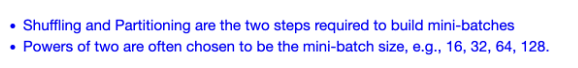

Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence. Using momentum can reduce these oscillations.

Momentum takes into account the past gradients to smooth out the update. The 'direction' of the previous gradients is stored in the variable  𝑣. Formally, this will be the exponentially weighted average of the gradient on previous steps. You can also think of  𝑣 as the "velocity" of a ball rolling downhill, building up speed (and momentum) according to the direction of the gradient/slope of the hill.

Note that:

The velocity is initialized with zeros. So the algorithm will take a few iterations to "build up" velocity and start to take bigger steps.
If  𝛽=0
 , then this just becomes standard gradient descent without momentum.
How do you choose  𝛽
 ?

The larger the momentum  𝛽
  is, the smoother the update, because it takes the past gradients into account more. But if  𝛽
  is too big, it could also smooth out the updates too much.
Common values for  𝛽
  range from 0.8 to 0.999. If you don't feel inclined to tune this,  𝛽=0.9
  is often a reasonable default.
Tuning the optimal  𝛽
  for your model might require trying several values to see what works best in terms of reducing the value of the cost function  𝐽
 .

Momentum takes past gradients into account to smooth out the steps of gradient descent. It can be applied with batch gradient descent, mini-batch gradient descent or stochastic gradient descent.You have to tune a momentum hyperparameter  𝛽 and a learning rate  𝛼.

## Week 3   Hyperparameter Tuning

How to systematically organize your hyperparameter tuning process, which hopefully will make it more efficient for you to converge on a good setting of the hyperparameters. 

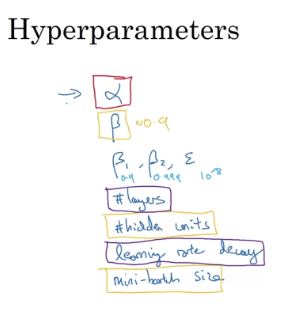

Alpha or learning rate is probably most important hyperparameter to tune. Next maybe yellow colored & then purple.

**Now, if you're trying to tune some set of hyperparameters, how do you select a set of values to explore?**

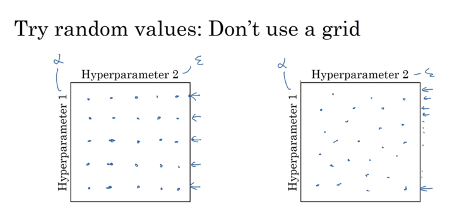

Some hyperparameters are actually much more important than others. So to take an example, let's say hyperparameter one turns out to be alpha, the learning rate. And to take an extreme example, let's say that hyperparameter two was that value epsilon that you have in the denominator of the Adam algorithm. So your choice of alpha matters a lot and your choice of epsilon hardly matters. So if you sample in the grid then you've really tried out five values of alpha and you might find that all of the different values of epsilon give you essentially the same answer. So you've now trained 25 models and only got into trial five values for the learning rate alpha, which I think is really important. Whereas in contrast, if you were to sample at random, then you will have tried out 25 distinct values of the learning rate alpha and therefore you be more likely to find a value that works really well.

Sampling at random rather than in the grid shows that you are more richly exploring set of possible values for the most important hyperparameters, whatever they turn out to be. 

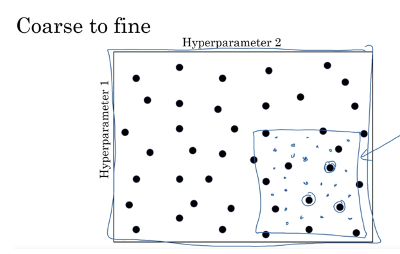

In the course of the final scheme what you might do is zoom in to a smaller region of the hyperparameters, and then sample more density within this space. Or maybe again at random, but to then focus more resources on searching within this blue square if you're suspecting that the best setting, the hyperparameters, may be in this region. So after doing a coarse sample of this entire square, that tells you to then focus on a smaller square. You can then sample more densely into smaller square. So this type of a coarse to fine search is also frequently used.

 And it's because that formula we have, 1 / 1- beta, this is very sensitive to small changes in beta, when beta is close to 1. So what this whole sampling process does, is it causes you to sample more densely in the region of when beta is close to 1.

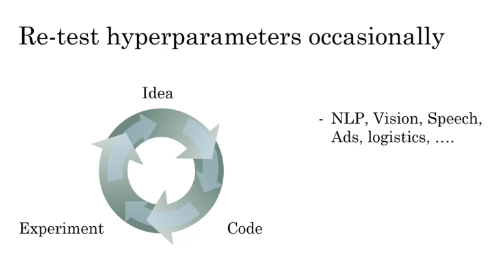

In terms of your settings for the hyperparameters, though, I've seen that intuitions do get stale. So even if you work on just one problem, say logistics, you might have found a good setting for the hyperparameters and kept on developing your algorithm, or maybe seen your data gradually change over the course of several months, or maybe just upgraded servers in your data center. And because of those changes, the best setting of your hyperparameters can get stale. So I recommend maybe just retesting or reevaluating your hyperparameters at least once every several months to make sure that you're still happy with the values you have. 

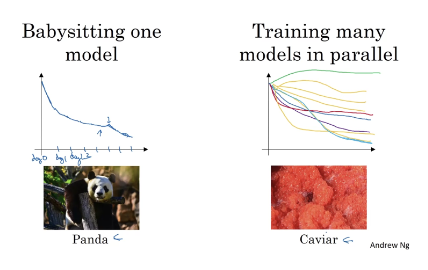

### Batch Normalizattion

In other words, batch normalization is performed as part of the network learning process and is applied to the activations of the hidden layers, rather than the raw input data.






**Benefits of Batch Normalization**

Batch Normalization offers several benefits in the context of training deep neural networks:

1. **Speeds Up Learning**: By normalizing activations throughout the network, it reduces the amount by which the hidden unit values shift around, allowing for faster convergence of the network.

2. **Regularizes the Network**: Batch normalization adds a small amount of noise to the network. Similar to dropout, it provides a bit of regularization, meaning the need for dropout may be reduced after applying batch normalization.

3. **Allows Higher Learning Rates**: Gradient descent usually requires small learning rates for the network to converge. Because batch normalization makes sure that there's no activation that's gone really high or really low, and that all the activations are scaled within a certain range, networks are less likely to get stuck during training, allowing the use of higher learning rates.

4. **Makes Weights Initialization Less Critical**: Without batch normalization, the distribution of each layer’s input changes during training, as the parameters of the previous layers change. This is known as the Internal Covariate Shift problem. This slows down the training by requiring lower learning rates and careful parameter initialization. Batch Normalization helps mitigate this problem.

5. **Can Allow for More Activation Functions**: Some activation functions don’t work well in certain situations. Sigmoid loses its gradient pretty quickly, which means it's used only at the output layer. Because batch normalization regulates the values going into each activation function, non-linearities that don’t work well in certain scenarios might work better if batch normalization is applied.

6. **Reduces Overfitting**: Batch normalization has a slight regularization effect, similar to dropout, as during the training process, each mini-batch is scaled by the mean/variance computed on just that mini-batch. This adds some noise to the model's learning process, thus providing a bit of regularization, leading to a reduction in overfitting.

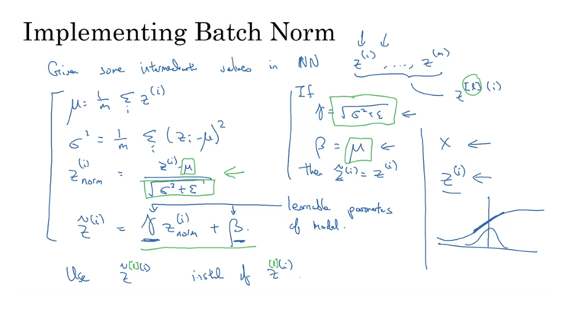

So that's why with the parameters gamma and beta, you can now make sure that your zi values have the range of values that you want. But what it does really is it then shows that your hidden units have standardized mean and variance, where the mean and variance are controlled by two explicit parameters gamma and beta which the learning algorithm can set to whatever it wants. So what it really does is it normalizes in mean and variance of these hidden unit values, really the zis, to have some fixed mean and variance. And that mean and variance could be 0 and 1, or it could be some other value, and it's controlled by these parameters gamma and beta.

*Applying Batch Norm to whole training data, as if u r using Batch Grasient Descent*

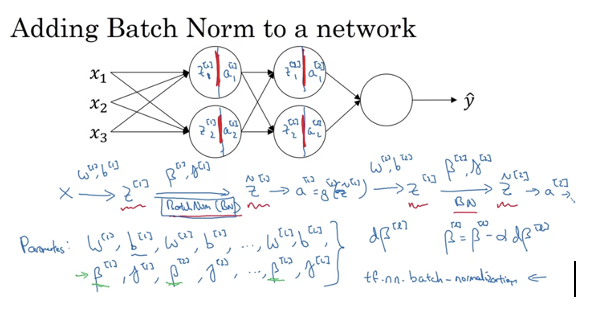

*Applying Batch Norm to mini-batches of ur training set*

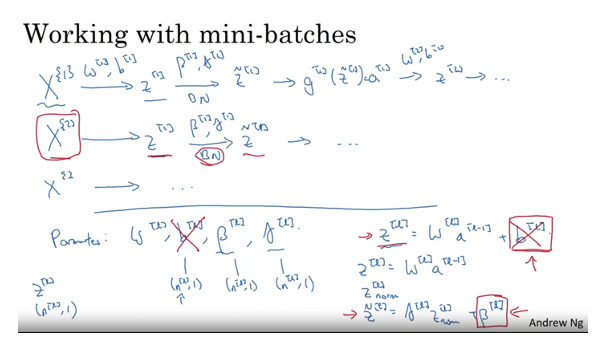

Some of these other optimization algorithms as well can be used to update the parameters Beta and Gamma that Batch Norm added to algorithm. Beta and Gamma providing scaling factor.

- In TensorFlow (and other deep learning frameworks), the implementation of the gradient descent algorithm typically includes both the forward propagation and backpropagation steps.

- When you define and train a neural network model in TensorFlow, you specify the architecture of the network (layers, activation functions, etc.) and the loss function that you want to minimize. During the training process, TensorFlow automatically performs the forward propagation step to compute the predicted output for a given input.

- After the forward propagation, TensorFlow uses automatic differentiation to compute the gradients of the loss function with respect to the network's parameters. This is essentially the backpropagation step, where the gradients are calculated by traversing the computational graph in reverse order.

- Once the gradients are computed, TensorFlow provides optimization algorithms, including gradient descent variants, to update the network's parameters using these gradients. You can specify the optimizer and its learning rate to control how the parameters are updated during training.


- So, in TensorFlow, you don't have to manually implement the forward propagation and backpropagation steps for gradient descent. The framework handles these steps internally, allowing you to focus on defining the network architecture and training process.



Batch Norm speeds up training dramatically.

**Why Convergence can be easier for optimization algorithms on small values compared to large values??**

- This is due to a phenomenon known as the "vanishing" or "exploding" gradients.


- The gradients in optimization algorithms, such as gradient descent, play a crucial role in updating the model parameters during training. The magnitude of the gradients determines the size of the parameter updates. When the gradients are too small or too large, it can lead to challenges in convergence.

- When working with large values, especially in deep neural networks with many layers, the gradients can become extremely small during backpropagation. This is known as the vanishing gradients problem. As the gradients propagate backward through the layers, they can diminish exponentially, making it difficult for the network to update the parameters effectively. Consequently, the network may converge very slowly or not at all.

- On the other hand, if the values are too large, the gradients can become excessively large during backpropagation, leading to the exploding gradients problem. In this case, the gradients can grow exponentially as they propagate backward through the network. This can cause the parameter updates to become too large and result in unstable training or divergence.

- When the values are small, the gradients are generally more moderate in magnitude, making them more suitable for stable and efficient updates during optimization. The parameter updates are more likely to move the model towards the optimal solution, leading to faster convergence.

- To mitigate the vanishing or exploding gradients problem, various techniques have been developed, such as careful initialization of network weights, using activation functions that alleviate the problem (e.g., ReLU), applying gradient clipping, and using normalization techniques like batch normalization.



### Covariate Shift

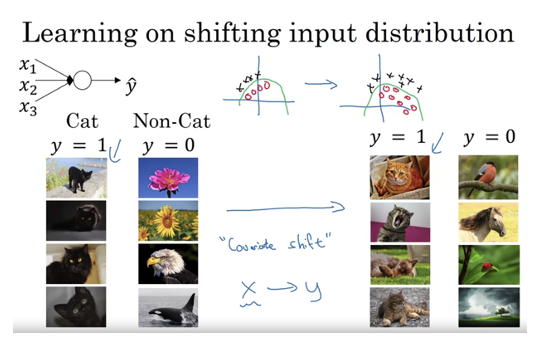

So, this idea of your data distribution changing goes by the somewhat fancy name, covariate shift. And the idea is that, if you've learned some X to Y mapping, if the distribution of X changes, then you might need to retrain your learning algorithm. And this is true even if the function, the ground true function, mapping from X to Y, remains unchanged, which it is in this example, because the ground true function is, is this picture a cat or not. And the need to retain your function becomes even more acute or it becomes even worse if the ground true function shifts as well. 

So what batch norm does, is it reduces the amount that the distribution of these hidden unit values shifts around. What batch norm is saying is that, the values for Z_2_1 Z and Z_2_2 can change, and indeed they will change when the neural network updates the parameters in the earlier layers. But what batch norm ensures is that no matter how it changes, the mean and variance of Z_2_1 and Z_2_2 will remain the same. So even if the exact values of Z_2_1 and Z_2_2 change, their mean and variance will at least stay same mean zero and variance one. Or, not necessarily mean zero and variance one, but whatever value is governed by beta two and gamma two.

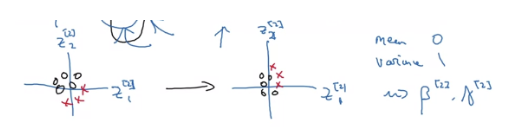

It limits the amount to which updating the parameters in the earlier layers can affect the distribution of values that the third layer now sees and therefore has to learn on. And so, batch norm reduces the problem of the input values changing, it really causes these values to become more stable, so that the later layers of the neural network has more firm ground to stand on. And even though the input distribution changes a bit, it changes less, and what this does is, even as the earlier layers keep learning, the amounts that this forces the later layers to adapt to as early as layer changes is reduced or, if you will, it weakens the coupling between what the early layers parameters has to do and what the later layers parameters have to do. And so it allows each layer of the network to learn by itself, a little bit more independently of other layers, and this has the effect of speeding up of learning in the whole network.

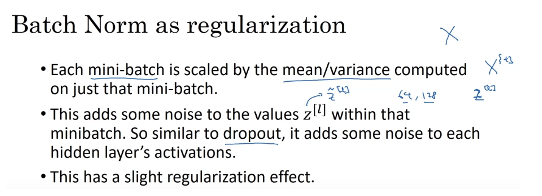

So similar to dropout, it adds some noise to each hidden layer's activations. The way dropout has noises, it takes a hidden unit and it multiplies it by zero with some probability. And multiplies it by one with some probability. And so your dropout has multiplicative noise because it's multiplied by zero or one, whereas batch norm has multiplicative noise because of scaling by the standard deviation, as well as additive noise because it's subtracting the mean

Multiplicative noise affects the signal by multiplying it with a random factor, while additive noise affects the signal by adding a random value to it. Multiplicative noise is commonly encountered in various fields, such as image processing, audio processing, and communication systems. Additive noise can arise from various sources, such as electronic interference, measurement errors, or environmental factors.

So that's one strange property of dropout which is that by using a bigger mini-batch size, you reduce the regularization effect.

But, really, don't turn to batch norm as a regularization. Use it as a way to normalize your hidden units activations and therefore speed up learning. And I think the regularization is an almost unintended side effect.

### Multi-Class Classification

There's a generalization of logistic regression called Softmax regression. The less you make predictions where you're trying to recognize one of C or one of multiple classes, rather than just recognize two classes. 

### Softmax Function

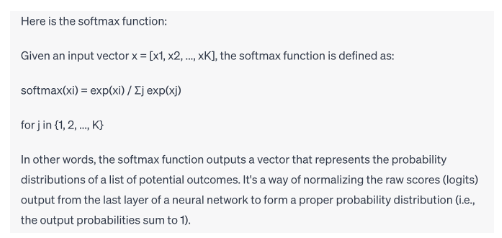

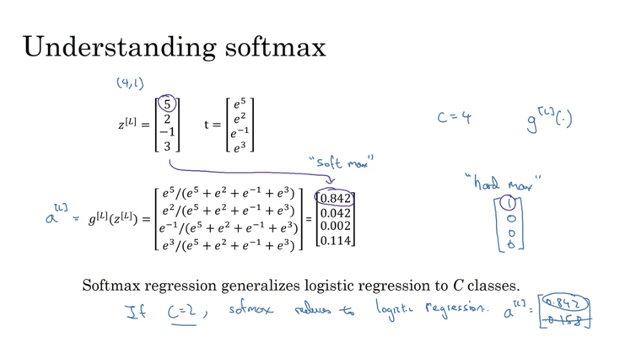

So previously, our activation functions used to take in a single row value input. So for example, the sigmoid and the Relu activation functions input the real number and output a real number. The unusual thing about the Softmax activation function is, because it needs to normalized across the different possible outputs, and needs to take a vector and puts in outputs of vector. 

**So below figure shows the type of things the Softmax crossfire can do when there is no hidden layer of class.**  So we can maybe we kind of see that this is like a generalization of logistic regression with sort of linear decision boundaries, but with more than two classes. one intuition is that the decision boundary between any two classes will be more linear. That's why you see for example that decision boundary between the yellow and the various classes, that's the linear boundary where the purple and red linear in boundary between the purple and yellow and other linear decision boundary. But able to use these different linear functions in order to separate the space into three classes.

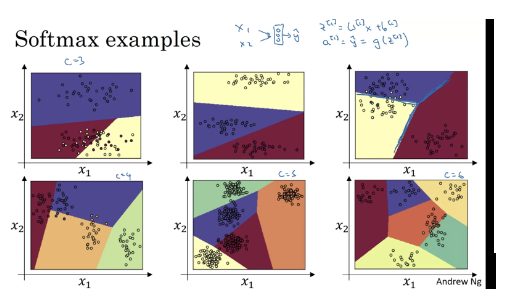

If Deeper neural network with x and then some hidden units, and then more hidden units, and so on. Then you can learn even more complex non-linear decision boundaries to separate out multiple different classes.

**Maximum Likelihood Estimation** -> Where ground truth y=1 make corresponding yhat probability big.

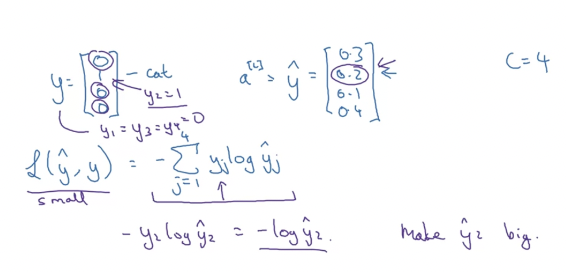

### DL Frameworks

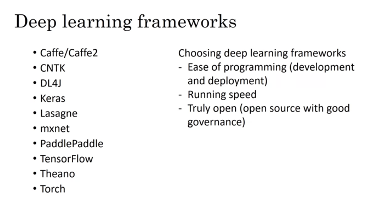